Here I would like to analyze the distribution of properties on the map

Importing libraries

In [23]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.colors import Normalize
import seaborn as sns

import geopandas as gpd
import folium
from folium.plugins import HeatMap
from matplotlib.patches import FancyArrow

In [2]:
# defiitions for plot size and line thickness
def mm2inch(*tupl):
    inch = 25.4
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)
def mm2point(mm):
    return mm/(25.4/72)
font = {'family' : 'Arial',
         'weight' : 'normal',
         'size'   : 15}
mpl.rc('font', **font)
mpl.rcParams['axes.linewidth'] = mm2point(0.4)
mpl.rcParams['ytick.major.width'] = mm2point(0.4)
mpl.rcParams['xtick.major.width'] = mm2point(0.4)

In [3]:
#setting the options to show all the columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df= pd.read_csv("Airbnb_Open_Data.csv")

C:\Users\Raisul\AppData\Local\Temp\ipykernel_4904\721149800.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("Airbnb_Open_Data.csv")


In [5]:
#Looking at the lenth and columns of the dataset
print("Lenth of the dataset:",len(df))
print("Column names:",df.columns)

Lenth of the dataset: 102599
Column names: Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')


In [6]:
#Now get the unique id
print("The number of total unique id:", df["id"].nunique())

The number of total unique id: 102058


In [7]:
#Drop the duplicated ids
df_unique = df.drop_duplicates(subset="id")
print("The number of total unique id for df_unique:", len(df_unique))

The number of total unique id for df_unique: 102058


Plot the Map of Newyork showing administrative division and the location of air bnb houses

In [8]:
# URL to a shapefile containing NYC borough boundaries
# This URL might change, so ensure you have the correct path to a valid shapefile
url = "https://data.cityofnewyork.us/api/geospatial/7t3b-ywvw?method=export&format=Shapefile"

# Load the shapefile into a GeoDataFrame
boroughs = gpd.read_file(url)

In [9]:
boroughs

,boro_code,boro_name,shape_leng,shape_area,geometry
0,3.0,Brooklyn,728150.705111,1.934143e+09,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ..."
1,5.0,Staten Island,325910.306061,1.623619e+09,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
2,1.0,Manhattan,360056.730857,6.366456e+08,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
3,2.0,Bronx,463180.578878,1.187175e+09,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."
4,4.0,Queens,888197.010944,3.041418e+09,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ..."


Create map and show distribution of properties

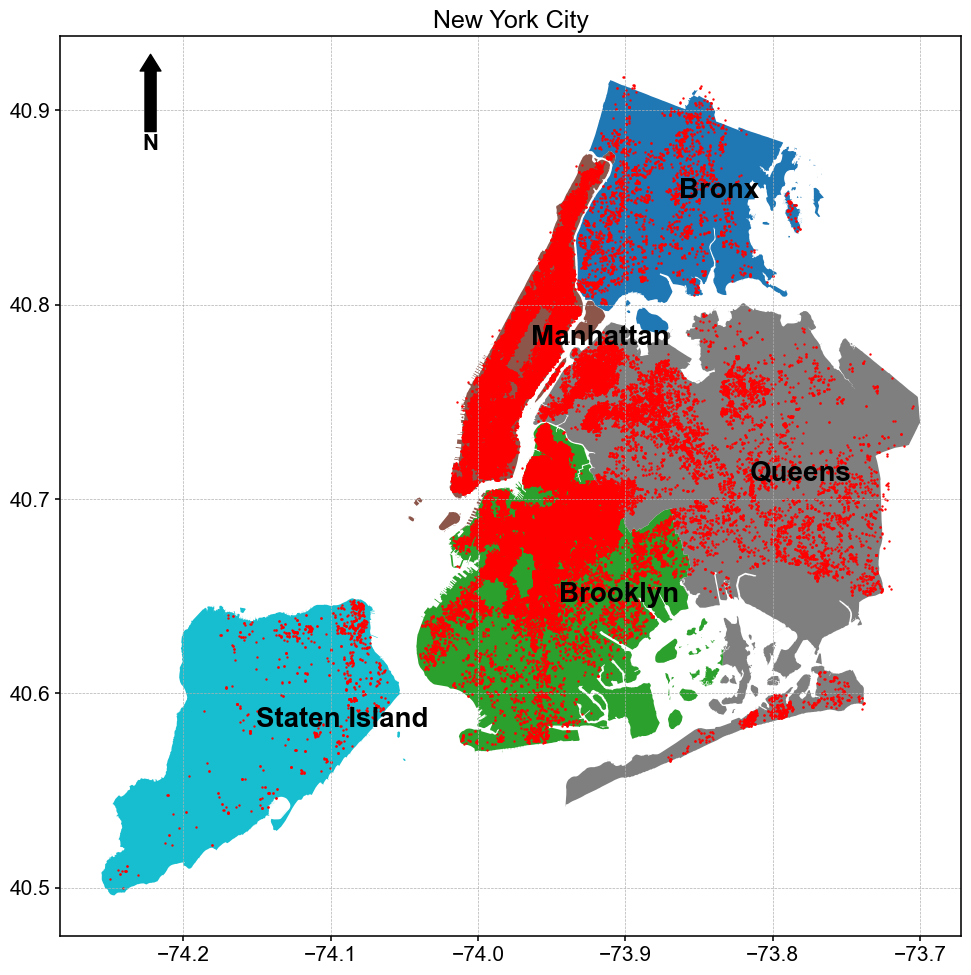

In [32]:
# Plot the map of New York City boroughs
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
boroughs.plot(ax=ax, column='boro_name')

# Add annotations for borough names
for idx, row in boroughs.iterrows():
    centroid = row.geometry.centroid  # Get centroid of each borough polygon
    ax.annotate(text=row['boro_name'], xy=(centroid.x, centroid.y), xytext=(3, 3), textcoords='offset points', fontsize=20, fontweight= "bold")

# Set plot title and labels
plt.title('New York City')
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')
ax.scatter(df_unique["long"], df_unique["lat"], color= "red", s= 0.5)
# Remove axis ticks for a cleaner look
#ax.set_xticks([])
#ax.set_yticks([])

#draw the grid lines
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add a north arrow
x, y, arrow_length = 0.1, 0.98, 0.1  # Adjust the position and length as needed
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=8, headwidth=15),
            ha='center', va='center', fontsize=16, fontweight='bold',
            xycoords=ax.transAxes)

plt.savefig("E:/ReDi_School/Data_Analytics/Project/Figure/4_Newyork_map")
# Show the plot
plt.tight_layout()
plt.show()


Now plot the heatmap of locations with gradient of the prices

Here I will use df (main dataframe). Filter the important variables.

In [11]:
df_heatmap= df[["long", "lat", "price"]]

In [12]:
df_heatmap.head()

,long,lat,price
0,-73.97237,40.64749,$966
1,-73.98377,40.75362,$142
2,-73.94190,40.80902,$620
3,-73.95976,40.68514,$368
4,-73.94399,40.79851,$204


In [13]:
df_heatmap["price"]= df_heatmap["price"].str[1:].str.replace(",", "").astype(float) # deleting the $ sign and converting to float datatype

C:\Users\Raisul\AppData\Local\Temp\ipykernel_4904\28685931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_heatmap["price"]= df_heatmap["price"].str[1:].str.replace(",", "").astype(float) # deleting the $ sign and converting to float datatype


In [14]:
df_heatmap.head()

,long,lat,price
0,-73.97237,40.64749,966.0
1,-73.98377,40.75362,142.0
2,-73.94190,40.80902,620.0
3,-73.95976,40.68514,368.0
4,-73.94399,40.79851,204.0


In [15]:
#drop na values
df_heatmap= df_heatmap.dropna()

In [16]:
#coordinates of the city centers of the divisions
nyc_boroughs_coordinates = {
    'Manhattan': {'latitude': 40.7831, 'longitude': -73.9712},
    'Brooklyn': {'latitude': 40.6782, 'longitude': -73.9442},
    'Queens': {'latitude': 40.7282, 'longitude': -73.7949},
    'Bronx': {'latitude': 40.8448, 'longitude': -73.8648},
    'Staten Island': {'latitude': 40.5795, 'longitude': -74.1502}
}

In [17]:
#converting this dictionary into dataframe
nyc_coordinates= pd.DataFrame.from_dict(nyc_boroughs_coordinates
                                      ,orient="index"
                                      ).reset_index()

nyc_coordinates

,index,latitude,longitude
0,Manhattan,40.7831,-73.9712
1,Brooklyn,40.6782,-73.9442
2,Queens,40.7282,-73.7949
3,Bronx,40.8448,-73.8648
4,Staten Island,40.5795,-74.1502


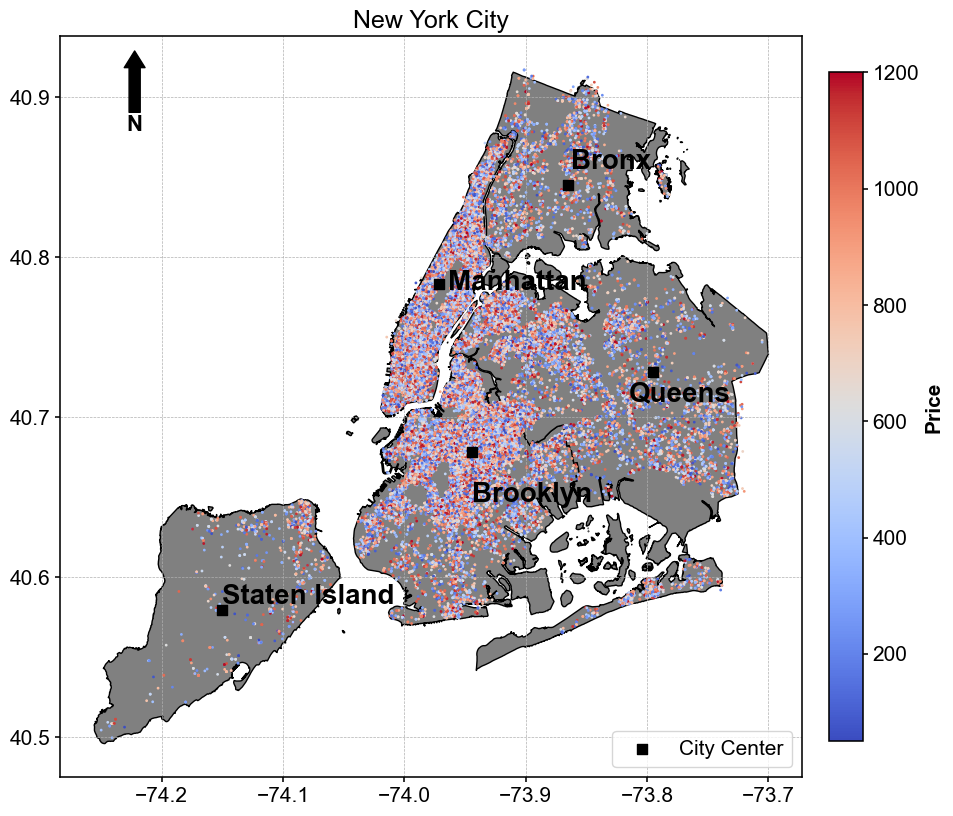

In [43]:
# Plot the map of New York City boroughs
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
boroughs.plot(ax=ax, color='grey', edgecolor='black')  # Plot boroughs with black edges

# Add annotations for borough names
for idx, row in boroughs.iterrows():
    centroid = row.geometry.centroid  # Get centroid of each borough polygon
    ax.annotate(text=row['boro_name'], xy=(centroid.x, centroid.y), xytext=(3, 3), textcoords='offset points', fontsize=20, fontweight= "bold")

# Set plot title and labels
plt.title('New York City')
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')
# Plot unique locations with color gradient based on price using 'coolwarm' colormap
norm = Normalize(vmin=df_heatmap['price'].min(), vmax=df_heatmap['price'].max())
sc = ax.scatter(df_heatmap["long"], df_heatmap["lat"], c=df_heatmap["price"], cmap='coolwarm', norm=norm, s=1.0)
#sc = ax.scatter(df_heatmap["long"], df_heatmap["lat"], c=df_heatmap["price"], cmap='tab10', norm=norm, s=1.0)
# Remove axis ticks for a cleaner look
#ax.set_xticks([])
#ax.set_yticks([])

# Add a north arrow
x, y, arrow_length = 0.1, 0.98, 0.1  # Adjust the position and length as needed
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=8, headwidth=15),
            ha='center', va='center', fontsize=16, fontweight='bold',
            xycoords=ax.transAxes)

# Add colorbar
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', pad=0.03, shrink=0.7)  # Adjust the parameters as needed
cbar.set_label('Price', fontweight= "bold")  # Set label for colorbar

ax.scatter(nyc_coordinates["longitude"], nyc_coordinates["latitude"], color= "black", s=50, marker='s', label= "City Center")
ax.legend(loc= "lower right", fontsize= 15)

#draw the grid lines
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.savefig("E:/ReDi_School/Data_Analytics/Project/Figure/5_HeatMap")
# Show the plot
plt.tight_layout()
plt.show()


plot the points with higher and lower prices 

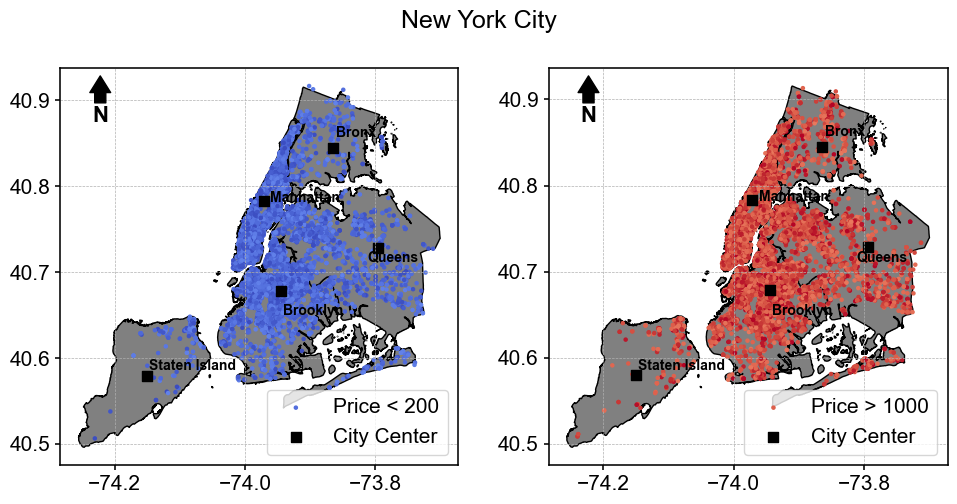

In [63]:
# Create a plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
boroughs.plot(ax=ax1, color='grey', edgecolor='black')  # Plot boroughs with black edges
boroughs.plot(ax=ax2, color='grey', edgecolor='black')  # Plot boroughs with black edges

# Add annotations for borough names
for idx, row in boroughs.iterrows():
    centroid = row.geometry.centroid  # Get centroid of each borough polygon
    ax1.annotate(text=row['boro_name'], xy=(centroid.x, centroid.y), xytext=(3, 3), textcoords='offset points', fontsize=10, fontweight="bold")
    ax2.annotate(text=row['boro_name'], xy=(centroid.x, centroid.y), xytext=(3, 3), textcoords='offset points', fontsize=10, fontweight="bold")

# Set plot title
fig.suptitle('New York City')

# Plot points with price < 200
df_low_price = df_heatmap[df_heatmap['price'] < 200]
sc1 = ax1.scatter(df_low_price["long"], df_low_price["lat"], c=df_low_price["price"], cmap='coolwarm', norm=norm, s=5.0, label='Price < 200')

# Plot points with price > 1000
df_high_price = df_heatmap[df_heatmap['price'] > 1000]
sc2 = ax2.scatter(df_high_price["long"], df_high_price["lat"], c=df_high_price["price"], cmap='coolwarm', norm=norm, s=5.0, label='Price > 1000')

# Add a north arrow
x, y, arrow_length = 0.1, 0.98, 0.1  # Adjust the position and length as needed
ax1.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=8, headwidth=15),
            ha='center', va='center', fontsize=16, fontweight='bold',
            xycoords=ax1.transAxes)
ax2.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=8, headwidth=15),
            ha='center', va='center', fontsize=16, fontweight='bold',
            xycoords=ax2.transAxes)

# Add colorbar
#cbar = plt.colorbar(sc1, ax=ax1, orientation='vertical', pad=0.03, shrink=0.7)  # Adjust the parameters as needed
#cbar.set_label('Price', fontweight="bold")  # Set label for colorbar

# Plot city center
ax1.scatter(nyc_coordinates["longitude"], nyc_coordinates["latitude"], color="black", s=50, marker='s', label="City Center")
ax2.scatter(nyc_coordinates["longitude"], nyc_coordinates["latitude"], color="black", s=50, marker='s', label="City Center")

# Add legend
ax1.legend(loc= "lower right", fontsize= 15)
ax2.legend(loc= "lower right", fontsize= 15)
# Draw the grid lines
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)

# Save the plot
plt.savefig("E:/ReDi_School/Data_Analytics/Project/Figure/9_HeatMap_high_low")

# Show the plot
plt.tight_layout()
plt.show()